# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

****************************************************************************************************************************
<h4>Predict Salaries for job postings.
****************************************************************************************************************************

In [1]:
#import your libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
%pylab
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression, Ridge,SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

#your info here
__author__ = "Pooja Mehta"
__email__ = "pmehta27@hawk.iit.edu"

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe
def load_Data(file_name):
    df = pd.read_csv(file_name)
    return df

In [3]:
#Loading training data
train_features_df = load_Data("data/train_features.csv")
train_features_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
#Loading target data
train_target_df = load_Data("data/train_salaries.csv")
train_target_df.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [11]:
#Loading test data
test_features_df = load_Data("data/test_features.csv")
test_features_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


### ---- 3 Clean the data ----

In [6]:
# High-level overview of how data looks like
# Examine the data using head()
# 1 -- training data
train_features_df.head(15)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [7]:
# Examine the data using head()
# 2 -- target data (salary is our target variable)
train_target_df.head(15)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


In [13]:
# Examine the data using head()
# 3 -- test data
test_features_df.head(15)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


In [14]:
# Lets dive deep and look at the column information for each data frame
# We shall use info() to view length and data types
# 1-training data
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [15]:
# We shall use info() to view length and data types
# 2-target data
train_target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [16]:
# We shall use info() to view length and data types
# 3-test data
test_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [17]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

# Check if training data has any duplicate entries
print("Sum of Duplicate values in training data set:",train_features_df.duplicated().sum())

Sum of Duplicate values in training data set: 0


In [18]:
# Categorize the columns into numerical and categorical -- this is because while building model categorical values are handled 
# in different manner compared to numerical values.
print("==========================================================================================")
print("List of columns in training data frame:\n")
print(train_features_df.columns)
print("==========================================================================================")
#train_features_df.info()
numerical_columns_list = ['milesFromMetropolis','yearsExperience']
categorical_columns_list = ['jobId','companyId','jobType','degree','major','industry']
print("List of Numerical Columns:",numerical_columns_list)
print("==========================================================================================")
print("List of Categorical Columns:",categorical_columns_list)
print("==========================================================================================")

List of columns in training data frame:

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')
List of Numerical Columns: ['milesFromMetropolis', 'yearsExperience']
List of Categorical Columns: ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']


In [19]:
# Statistical Summary of Numerical Variable using describe()
train_features_df.describe(include=[np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [20]:
# Statistical Summary of Categorical Variable using describe()
train_features_df.describe(include=['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685300613,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


In [21]:
# Check for missing values if any in training data set
print("Missing values:\n")
print(train_features_df.isnull().sum())

Missing values:

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64


In [22]:
# Statistical Summary of "salary" variable using describe() in target dataset
train_target_df.describe(include=[np.number])
#train_target_df.describe(include=['O'])

,salary
count,1000000.000000
mean,116.061818
std,38.717936
min,0.000000
25%,88.000000
50%,114.000000
75%,141.000000
max,301.000000


****************************************************************************************************************************
To summarize, we have 1000000 records and 8 columns. There is no missing or duplicate data. Attribute jobID is unique as it contains 1000000 unique records. Lets merge target variable and features from training data into single data frame called merge_train_data_df based on jobID. This merged data frame will help us visually determine the correlation between target variable and other features.
****************************************************************************************************************************

### ---- 4 Explore the data (EDA) ----

In [23]:
# Merge salary (target variable) with features from training_feature_df
merge_train_data_df = pd.merge(train_features_df,train_target_df, on='jobId')
merge_train_data_df.head(15)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104


In [24]:
#Now let's check if any salary is 0 or negative
train_salary_less_than_0 = merge_train_data_df[merge_train_data_df['salary']<=0]
print("Total number of records with salary 0 or negative:",len(train_salary_less_than_0))
train_salary_less_than_0.head()

Total number of records with salary 0 or negative: 5


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


****************************************************************************************************************************
Salary cannot be negative or 0, also from above its obvious that for a professional with experience of 11 or 18 years (or someone at the position of Vice President or Manager) cannot  have salary 0. Hence, either this is corrupt data or missing data. We shall drop these 5 rows as it won't help us in predicting salaries for Job Types.
****************************************************************************************************************************

In [25]:
#Deleting records with salary <= 0

merge_train_data_df = merge_train_data_df.drop(merge_train_data_df[merge_train_data_df.salary <= 0].index)
merge_train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  999995 non-null object
companyId              999995 non-null object
jobType                999995 non-null object
degree                 999995 non-null object
major                  999995 non-null object
industry               999995 non-null object
yearsExperience        999995 non-null int64
milesFromMetropolis    999995 non-null int64
salary                 999995 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


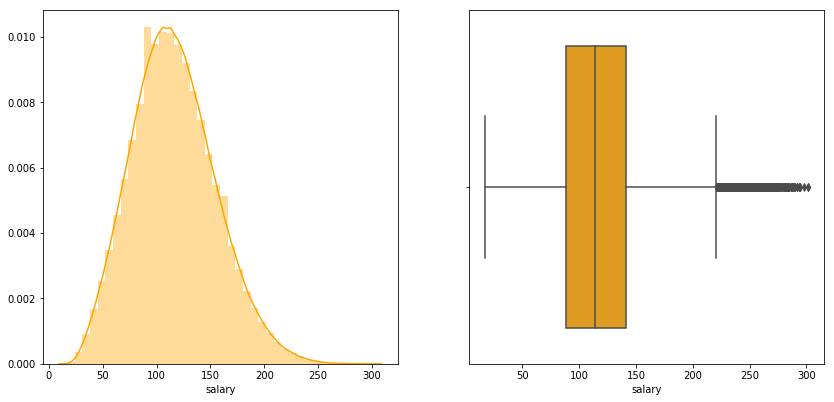

In [153]:
#summarize each feature variable 

#Statistical Summary of Numerical Variable using describe()
#train_features_df.describe(include=[np.number])
#train_features_df.describe(include=['O'])

#summarize the target variable 
#Statistical Summary of "salary" variable using describe() in target dataset
#train_target_df.describe(include=[np.number])
#train_target_df.describe(include=['O'])


#look for correlation between each feature and the target
#look for correlation between features

#Visualize target variable (part of univariate analysis) using boxplot and histogram
salary = merge_train_data_df['salary']
plt.figure(figsize(14,6.5))
plt.subplot(1,2,1)
sns.distplot(salary, bins = 40,color='orange')
plt.subplot(1,2,2)
sns.boxplot(salary,color='orange')
plt.show()

*******************************************************************************************************************************
From the above distance plot distribution of salary we can observe that 'salary' is normally distributed. The mean value for 'salary' is approximately 116 million dollars. From the box plot we can observe outliers after 220 million dollars. We shall perform some more tests to verify if they are outliers or not.
*******************************************************************************************************************************

In [26]:
#Check total number of records with salary>= 220 million dollars to understand the outliers

train_salary_greater_than_220 = merge_train_data_df[merge_train_data_df['salary']>=220]
print("Total number of records with salary greater than 220:",len(train_salary_greater_than_220))
print(train_salary_greater_than_220[['jobType','degree','industry','salary']])

Total number of records with salary greater than 220: 7577
               jobType       degree industry  salary
266                CEO      MASTERS      OIL     223
362                CTO      MASTERS   HEALTH     223
560                CEO      MASTERS      WEB     248
670                CEO      MASTERS     AUTO     240
719     VICE_PRESIDENT     DOCTORAL      OIL     225
966                CEO     DOCTORAL  FINANCE     247
986                CFO  HIGH_SCHOOL  FINANCE     229
1063               CTO      MASTERS     AUTO     220
1211               CTO     DOCTORAL  FINANCE     232
1222            JUNIOR      MASTERS      OIL     225
1413    VICE_PRESIDENT      MASTERS      WEB     241
1500               CTO    BACHELORS   HEALTH     225
1577               CEO  HIGH_SCHOOL   HEALTH     238
1827               CFO  HIGH_SCHOOL      OIL     234
1907               CFO    BACHELORS  FINANCE     243
2116               CFO     DOCTORAL     AUTO     237
2173               CTO     DOCTORAL  FIN

*******************************************************************************************************************************
We can observe that the jobType for most of the records with salary greater than 220 million dollars is CEO, CFO, Vice President
which is convincing. However, there are few records with jobType = 'JUNIOR' with MASTERS degree earning more than 220 million dollars. To confirm that this could be the case, lets look at jobType = 'JUNIOR' only.
*******************************************************************************************************************************

In [27]:
#Check the degree and industry for jobType='JUNIOR' to confirm if it is not an outlier
train_salary_greater_than_220_JUNIOR = train_salary_greater_than_220[train_salary_greater_than_220['jobType']=='JUNIOR']
print("Total number of records with jobType='JUNIOR' and salary greater than 220:",len(train_salary_greater_than_220_JUNIOR))
print(train_salary_greater_than_220_JUNIOR[['jobType','degree','industry','salary']])

#del train_salary_greater_than_220_JUNIOR
#del train_salary_greater_than_220

Total number of records with jobType='JUNIOR' and salary greater than 220: 24
       jobType     degree industry  salary
1222    JUNIOR    MASTERS      OIL     225
27710   JUNIOR   DOCTORAL      OIL     246
31355   JUNIOR   DOCTORAL  FINANCE     225
100042  JUNIOR   DOCTORAL  FINANCE     248
160333  JUNIOR   DOCTORAL  FINANCE     223
189582  JUNIOR   DOCTORAL      OIL     221
214606  JUNIOR    MASTERS  FINANCE     222
229209  JUNIOR   DOCTORAL  FINANCE     220
303778  JUNIOR    MASTERS      WEB     226
348354  JUNIOR   DOCTORAL      OIL     226
427593  JUNIOR   DOCTORAL  FINANCE     221
434423  JUNIOR   DOCTORAL  FINANCE     220
472109  JUNIOR   DOCTORAL      WEB     220
500739  JUNIOR   DOCTORAL      OIL     227
627534  JUNIOR   DOCTORAL      OIL     230
645555  JUNIOR   DOCTORAL  FINANCE     225
656572  JUNIOR   DOCTORAL      OIL     222
680872  JUNIOR  BACHELORS  FINANCE     220
685775  JUNIOR  BACHELORS      OIL     225
743326  JUNIOR   DOCTORAL  FINANCE     236
787674  JUNIOR   DO

*******************************************************************************************************************************
There are 24 records from approximately 7576 records with jobType ='JUNIOR' and salary >= 220 which is bare minimum. The interesting observation is that most of them have a masters or phd degree and all of the records belong to Finance and Oil industries except one which belongs to web. This implies that Finance and Oil industry have a high paying jobType named as 'JUNIOR'. Hence, I won't consider these records as outliers.
*******************************************************************************************************************************

In [28]:
merge_train_data_df.head(30)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104


*******************************************************************************************************************************
Since jobId is unique, we shall drop the column as it won't help in making predictions. In case of companyID, it is not unique but it represents a unique identification number associated wit various companies belonging to a particular industry. Hence, we shall not consider companyID as well for making predictions. 
*******************************************************************************************************************************

In [29]:
#look for correlation between each feature and the target
def plot_feature(df,col):
    fig = plt.figure(figsize(14,6.5))
    fig.add_subplot(1,2,1)
    var_col = df.groupby(col)['salary'].mean()
    var_col.plot(kind='line',color='blue')
    plt.xlabel(col)
    plt.ylabel('salaries')
    plt.show()

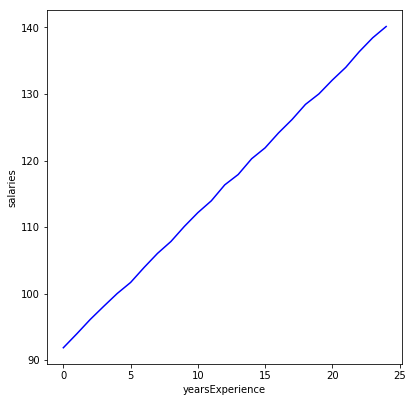

In [158]:
# years of Experience v/s salary
plot_feature(merge_train_data_df,'yearsExperience')

*****************************************************************************************************************
From the above line plot, we can observe that salary tends to increase as number of yearsExperience increases. Hence, there is a positive linear relationship between years of experience and salary. 
*********************************************************************************************************************

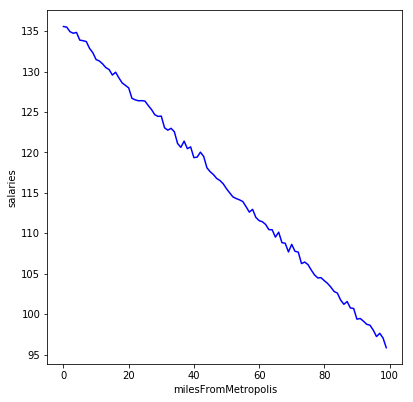

In [159]:
# miles from metropolis  v/s salary
plot_feature(merge_train_data_df,'milesFromMetropolis')

*****************************************************************************************************************
From the above line plot, we can observe that salary tends to increase as miles from Metropolis decreases. Hence, there is a negative linear relationship between 'milesFromMetropolis' and 'salary'. 
*********************************************************************************************************************

In [30]:
def plot_categorical_features(df,col):    
    col_count = pd.crosstab(index=df[col],columns="counts")   #Name the count columns
    print("Total number of counts per category")
    print(col_count.iloc[0:])
    print("\n")
    fig = plt.figure(figsize=(16,6))
    fig.add_subplot(1,2,1)
    df.groupby(col)['salary'].mean().plot(kind='line',color='blue')
    ax=fig.add_subplot(1,2,2)
    df.boxplot(column="salary",by=col,ax=ax)
    plt.show()

Total number of counts per category
col_0           counts
jobType               
CEO             124778
CFO             124369
CTO             125045
JANITOR         124971
JUNIOR          124592
MANAGER         125120
SENIOR          125886
VICE_PRESIDENT  125234




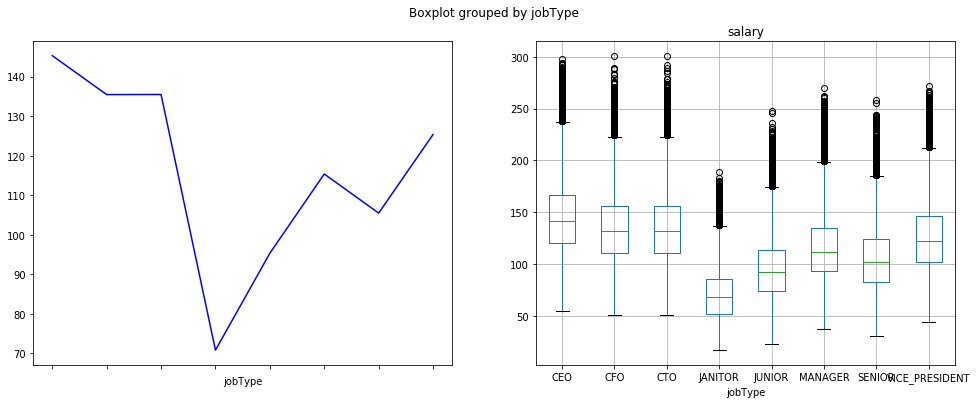

In [161]:
# correlation between jobType and salary
plot_categorical_features(merge_train_data_df,'jobType')

*************************************************************************************************************************
From plots above, we can observe that CEO, CFO, CTO are among the highest salary earning jobType and JANITOR and JUNIOR earn lowest among all jobTypes.
*************************************************************************************************************************

Total number of counts per category
col_0        counts
degree             
BACHELORS    175495
DOCTORAL     175362
HIGH_SCHOOL  236975
MASTERS      175310
NONE         236853




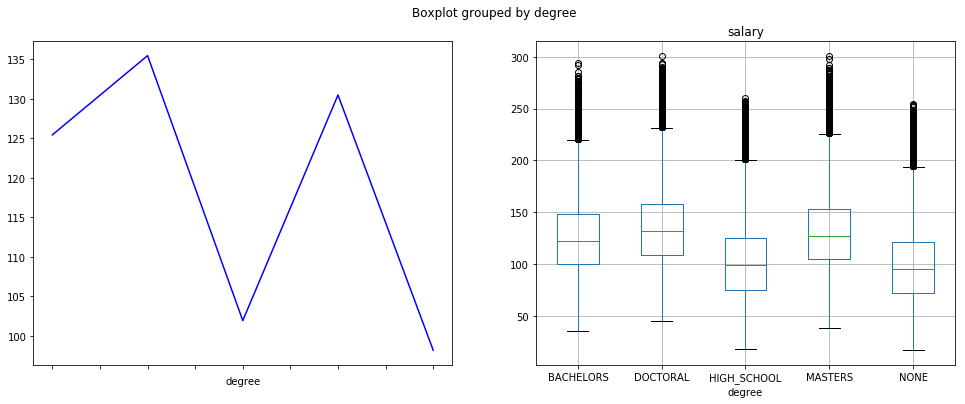

In [162]:
# correlation between degree and salary
plot_categorical_features(merge_train_data_df,'degree')

*************************************************************************************************************************
From plots above, we can observe that professionals with 'DOCTORAL' and 'MASTERS' are among the highest salary earning degree and professionals with no degree (NONE) earn lowest.
*************************************************************************************************************************

Total number of counts per category
col_0        counts
major              
BIOLOGY       58379
BUSINESS      58518
CHEMISTRY     58875
COMPSCI       58382
ENGINEERING   58594
LITERATURE    58684
MATH          57800
NONE         532353
PHYSICS       58410




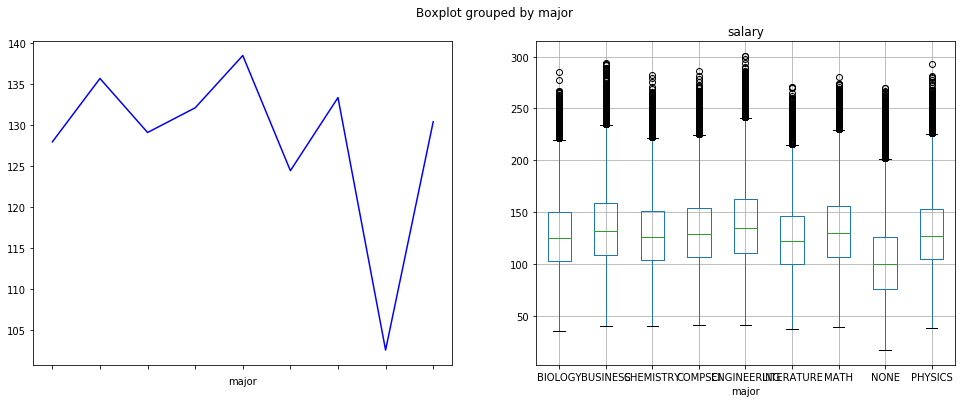

In [163]:
# correlation between major and salary
plot_categorical_features(merge_train_data_df,'major')

*************************************************************************************************************************
From plots above, we can observe that professionals from 'ENGINEER' and 'BUSINESS' are among the highest salary earning major and professionals from LITERATURE background earn lowest.
*************************************************************************************************************************

Total number of counts per category
col_0      counts
industry         
AUTO       142941
EDUCATION  142819
FINANCE    142866
HEALTH     142755
OIL        142770
SERVICE    142639
WEB        143205




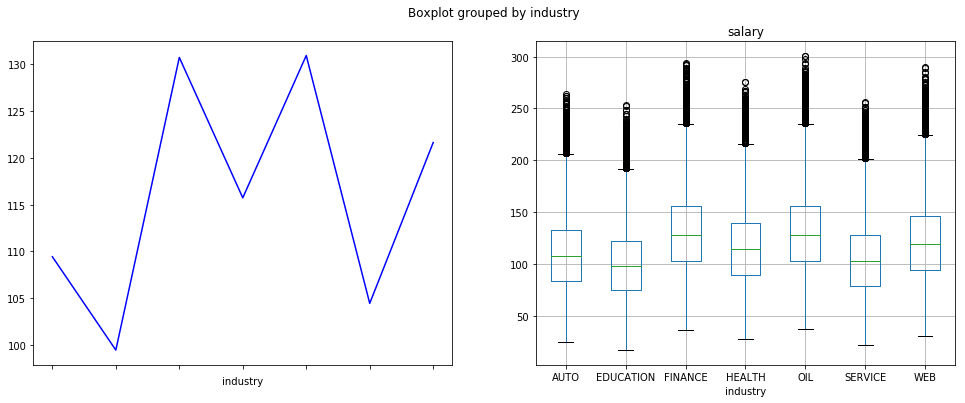

In [164]:
# correlation between industry and salary
plot_categorical_features(merge_train_data_df,'industry')

*************************************************************************************************************************
From plots above, we can observe that 'FINANCE' and 'OIL' are among the industries that pay highest and professionals from LITERATURE background earn lowest.
*************************************************************************************************************************

In [31]:
#create a copy of merge_train_data_df for customized heatmap
merge_train_df_heatmap = merge_train_data_df
merge_train_df_heatmap.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [32]:
# Change the dtype for categorical variables to category for label encoding

for col in merge_train_df_heatmap.columns:
    if merge_train_df_heatmap[col].dtype.name == 'object':
        merge_train_df_heatmap[col]=merge_train_df_heatmap[col].astype('category')
#merge_train_df_heatmap.info()
merge_train_df_heatmap=merge_train_df_heatmap.drop(columns=['jobId','companyId'])
merge_train_df_heatmap.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [33]:
# Perform label Encoding to handle categorical values
def encode_label(df,col):
    category_dict={}
    category_list = df[col].cat.categories.tolist()
    for each_category in category_list:
        category_dict[each_category]=merge_train_df_heatmap[merge_train_df_heatmap[col]==each_category]['salary'].mean()
    df[col]=df[col].map(category_dict)

In [34]:
for col in merge_train_df_heatmap.columns:
    if merge_train_df_heatmap[col].dtype.name == 'category':
        encode_label(merge_train_df_heatmap,col)
merge_train_df_heatmap.head(10)

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,135.458547,130.505647,133.322042,115.735540,10,83,130
1,145.311425,101.921085,102.583864,121.645362,3,73,101
2,125.368630,135.490979,130.372436,115.735540,10,38,137
3,115.368518,135.490979,129.072085,109.435222,8,17,142
4,125.368630,125.454663,130.372436,130.747659,8,16,163
5,115.368518,135.490979,132.075605,130.747659,2,31,113
6,135.458547,98.176882,102.583864,115.735540,23,24,178
7,95.333087,125.454663,129.072085,99.448386,9,70,73
8,70.813045,101.921085,102.583864,99.448386,1,54,31
9,125.368630,125.454663,129.072085,109.435222,17,68,104


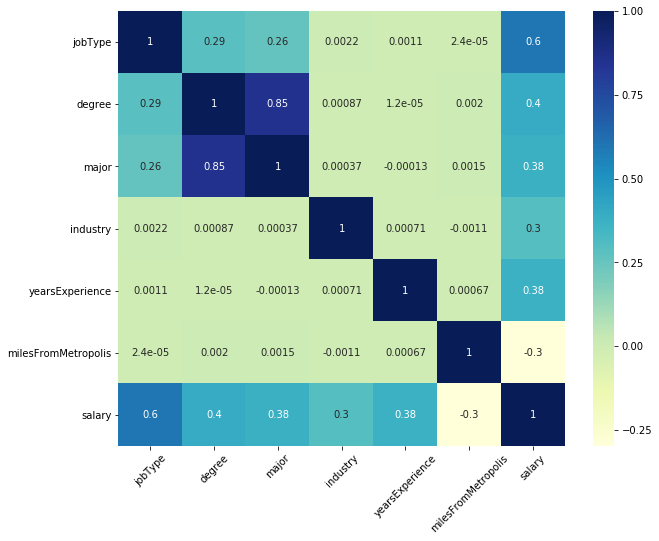

In [35]:
#Correlations between selected features and target variable. I have excluded 'jobID' as it is unique for each employee
fig = plt.figure(figsize=(10,8))
features_list = ['jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(merge_train_df_heatmap[features_list+['salary']].corr(),annot=True,cmap='YlGnBu')
plt.xticks(rotation=45)
plt.show()

*****************************************************************************************************************************
From the above heatmap, we can observe that jobType and degree seems to be highly correlated with target variable (salary). In general, jobType, major and degree seems to be highly correlated with each other. There is a negative correlation between milesFromMetropolis and salary (we also observed same in one of the line plots above).
*****************************************************************************************************************************

### ---- 5 Establish a baseline ----

In [36]:
#In this case study, I shall use average salary for each degree as a baseline model and 
#then measure MSE using 5-fold cross validation

train_data_baseline = merge_train_data_df[['jobType','salary']]
train_data_baseline = train_data_baseline.set_index(['jobType'])

mean_val = train_data_baseline.groupby('jobType')['salary'].mean()

train_data_baseline['salary_avg'] = mean_val
train_data_baseline = train_data_baseline.reset_index()

print(train_data_baseline.head())

          jobType  salary  salary_avg
0             CFO     130  135.458547
1             CEO     101  145.311425
2  VICE_PRESIDENT     137  125.368630
3         MANAGER     142  115.368518
4  VICE_PRESIDENT     163  125.368630


In [173]:
#Performing 10-fold cross validation for baseline model:

k = 0
mse_baseline = []
x = train_data_baseline['jobType']
y = train_data_baseline['salary']
y_baseline = train_data_baseline['salary_avg']

cross_val = KFold(n_splits=10,shuffle = True)           # set n_splits to 10 for 10-fold cross validation
cross_val.get_n_splits(x)                              # returns the number of splitting iterations after cross-validation
print("==================== 10-fold Cross-Validation ====================")
print(cross_val,"\n")

for train_index, test_index in cross_val.split(x):
    k += 1
    print('Fold: ', k)
    print("TRAIN:", train_index)
    print("TEST :", test_index)
    
    y_train, y_test = y[train_index], y[test_index]
    y_base_train , y_base_test = y_baseline[train_index], y_baseline[test_index]
    
    error = mean_squared_error(y_test, y_base_test)
    print('MSE', error)
    print("\n======================================================\n")
    mse_baseline.append(error)
    
print('Average MSE for baseline model:', np.array(mse_baseline).mean())

==================== 10-fold Cross-Validation ====================
KFold(n_splits=10, random_state=None, shuffle=True) 

Fold:  1
TRAIN: [     0      1      2 ... 999991 999993 999994]
TEST : [    19     38     59 ... 999957 999984 999992]
MSE 963.9837457544666


Fold:  2
TRAIN: [     1      2      3 ... 999992 999993 999994]
TEST : [     0      6     10 ... 999952 999953 999976]
MSE 966.8514651220087


Fold:  3
TRAIN: [     0      1      2 ... 999992 999993 999994]
TEST : [     5     24     31 ... 999981 999985 999986]
MSE 967.9379687186731


Fold:  4
TRAIN: [     0      1      2 ... 999992 999993 999994]
TEST : [     4     11     16 ... 999951 999989 999990]
MSE 962.0402884121938


Fold:  5
TRAIN: [     0      1      2 ... 999992 999993 999994]
TEST : [    14     41     61 ... 999979 999983 999988]
MSE 965.5811430051934


Fold:  6
TRAIN: [     0      1      2 ... 999990 999992 999993]
TEST : [     3     13     27 ... 999987 999991 999994]
MSE 969.1673072893477


Fold:  7
TRAIN: [    

****************************************************************************************************
The baseline model has been developed using one feature as a predictor, jobType as it seems to be highly correlated with salary from the heatmap plotted above to determine the salary. The MSE obtained is 963.92 and our goal is to achieve MSE less than 360.
Let's see further how we achieved this.
****************************************************************************************************

### ---- 6 Hypothesize solution ----

In [48]:
#1 -- Linear Regression Model 
#2 -- Polynomial Regression
#3 -- Stochastic Gradient Descent
#4 -- Ridge Regression

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [49]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

In [37]:
# create a data frame without jobId and companyId columns
train_data_df_final=merge_train_data_df.drop(columns=['jobId','companyId'])
train_data_df_final.head()
#train_data_df_final.ndim

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [38]:
#Performing One Hot Encoding using pandas get_dummies
def oneHotEncoding(col,df):
    df_1hot_dummies = pd.get_dummies(df[col])
    del df_1hot_dummies[df_1hot_dummies.columns[-1]]
    return df_1hot_dummies

In [39]:
#Encoding Categorical Variable 'jobType'
df_jobType = oneHotEncoding('jobType', train_data_df_final)
df_jobType.head()

,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR
0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0


In [40]:
#Encoding Categorical Variable 'major'
df_major = oneHotEncoding('major', train_data_df_final)
df_major.head()

,BIOLOGY,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,LITERATURE,MATH,NONE
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0


In [41]:
#Encoding Categorical Variable 'degree'
df_degree = oneHotEncoding('degree', train_data_df_final)
df_degree.head()

,BACHELORS,DOCTORAL,HIGH_SCHOOL,MASTERS
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0


In [42]:
#Encoding Categorical Variable 'industry'
df_industry = oneHotEncoding('industry', train_data_df_final)
df_industry.head()

,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE
0,0,0,0,1,0,0
1,0,0,0,0,0,0
2,0,0,0,1,0,0
3,1,0,0,0,0,0
4,0,0,1,0,0,0


In [43]:
#Concatenate all the one hot encoded dataframes into single dataframe including numerical variables for modelling
train_data_1hot = pd.DataFrame()
category_df_rmv = train_data_df_final.drop(columns = ['jobType','degree','major','industry'])
train_data_1hot = pd.concat([category_df_rmv, df_jobType, df_major, df_degree, df_industry],axis = 1)
train_data_1hot.head()
#train_data_1hot.info()

,yearsExperience,milesFromMetropolis,salary,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR,...,BACHELORS,DOCTORAL,HIGH_SCHOOL,MASTERS,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE
0,10,83,130,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,3,73,101,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,10,38,137,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,8,17,142,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,8,16,163,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [44]:
# create a final copy of dataframe 
df_train_data_final = train_data_1hot.copy()
#df_train_data_final.head()

y_target = df_train_data_final[['salary']]
#y_target.head()
x_predictors=df_train_data_final.drop(['salary'],axis=1)
x_predictors.head(10)

,yearsExperience,milesFromMetropolis,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR,BIOLOGY,...,BACHELORS,DOCTORAL,HIGH_SCHOOL,MASTERS,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE
0,10,83,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,3,73,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,10,38,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,8,17,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4,8,16,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
5,2,31,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
6,23,24,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,9,70,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
8,1,54,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
9,17,68,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [45]:
# Performing Normalization
#Get Column names first
col_names = x_predictors.columns

# Create a scaler object 
scaler = preprocessing.MinMaxScaler()

#Fit training data on to scaler object
scaled_df = scaler.fit_transform(x_predictors)
scaled_df = pd.DataFrame(scaled_df,columns=col_names)
scaled_df.head(10)

,yearsExperience,milesFromMetropolis,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR,BIOLOGY,...,BACHELORS,DOCTORAL,HIGH_SCHOOL,MASTERS,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE
0,0.416667,0.838384,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.125000,0.737374,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.416667,0.383838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.333333,0.171717,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.161616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.083333,0.313131,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.958333,0.242424,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.375000,0.707071,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.041667,0.545455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.708333,0.686869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### ---- 8 Create models  ----

In [184]:
#create and tune the models that you brainstormed during part 2

#build_model function performs cross validation, fits the desired model, returns the average Mean Squared Error

def build_model(model,):
    k = 0
    mse_baseline = []
    x = scaled_df
    y = y_target

    x = np.nan_to_num(x)
    y = np.nan_to_num(y)
    
    cross_val = KFold(n_splits=10,shuffle = True)           # set n_splits to 10 for 10-fold cross validation
    cross_val.get_n_splits(x)                               # returns the number of splitting iterations after cross-validation
    
    print("==================== 10-fold Cross-Validation ====================")
    print(cross_val,"\n")
    for train_index, test_index in cross_val.split(x):
        k += 1
        print('Fold: ', k)
        print("TRAIN:", train_index)
        print("TEST :", test_index)
    
        x_train,x_test = x[train_index],x[test_index]
        y_train, y_test = y[train_index], y[test_index] 
        
        if mode
        
        #Fitting the model
        model_fit = model.fit(x_train, y_train)
        # Applying on test data   
        y_pred = model_fit.predict(x_test)
    
        #Calculating the Mean Squared Error
        error = mean_squared_error(y_test, y_pred)
        print('MSE', error)
        print("\n======================================================\n")
        mse_baseline.append(error)

    avg_mse = np.array(mse_baseline).mean()
    return avg_mse

In [185]:
# Model 1 -- Perform Linear Regression 
model = LinearRegression()
avg_mse=build_model(model)
print('Average MSE for Linear Regression model:',avg_mse)

==================== 10-fold Cross-Validation ====================
KFold(n_splits=10, random_state=None, shuffle=True) 

Fold:  1
TRAIN: [     0      1      2 ... 999992 999993 999994]
TEST : [    11     12     15 ... 999961 999967 999987]
MSE 382.8494375294692


Fold:  2
TRAIN: [     1      2      3 ... 999992 999993 999994]
TEST : [     0     17     26 ... 999975 999982 999991]
MSE 386.6792220816313


Fold:  3
TRAIN: [     0      1      2 ... 999991 999993 999994]
TEST : [    10     30     34 ... 999986 999988 999992]
MSE 382.40778062104846


Fold:  4
TRAIN: [     0      2      3 ... 999992 999993 999994]
TEST : [     1     22     29 ... 999976 999977 999990]
MSE 383.9546154124214


Fold:  5
TRAIN: [     0      1      2 ... 999992 999993 999994]
TEST : [    19     24     39 ... 999950 999963 999973]
MSE 385.0853163380956


Fold:  6
TRAIN: [     0      1      2 ... 999992 999993 999994]
TEST : [     7     23     25 ... 999972 999974 999985]
MSE 384.32568305875867


Fold:  7
TRAIN: [  

In [48]:
k = 0
mse_baseline = []
x = scaled_df
y = y_target

x = np.nan_to_num(x)
y = np.nan_to_num(y)

y

array([[130],
       [101],
       [137],
       ...,
       [ 64],
       [149],
       [ 88]], dtype=int64)

In [78]:
# Model 2 -- Polynomial Features with Linear Regression
k = 0
mse_baseline = []
x = scaled_df
y = y_target

x = np.nan_to_num(x)
y = np.nan_to_num(y)

cross_val = KFold(n_splits=10,shuffle = True)           # set n_splits to 10 for 10-fold cross validation
cross_val.get_n_splits(x)                              # returns the number of splitting iterations after cross-validation
print("==================== 10-fold Cross-Validation ====================")
print(cross_val,"\n")

for train_index, test_index in cross_val.split(x):
    k += 1
    print('Fold: ', k)
    print("TRAIN:", train_index)
    print("TEST :", test_index)
    
    x_train,x_test = x[train_index],x[test_index]
    y_train, y_test = y[train_index], y[test_index]
       
    #tuning PolynomialFeatures()
    poly_model = PolynomialFeatures(degree = 2,interaction_only=True)
    x_poly_train = poly_model.fit_transform(x_train)
    x_poly_test = poly_model.fit_transform(x_test)
    model_polynomial_reg = LinearRegression() 
           
    #Fitting the linear regression model
    model_polynomial_reg = model_polynomial_reg.fit(x_poly_train, y_train)
    # Applying on test data   
    y_pred = model_polynomial_reg.predict(x_poly_test)
    
    #Calculating the Mean Squared Error
    error = mean_squared_error(y_test, y_pred)
    print('MSE', error)
    print("\n======================================================\n")
    mse_baseline.append(error)
    
print('Average MSE for Polynomial Linear Regression model:', np.array(mse_baseline).mean())

==================== 10-fold Cross-Validation ====================
KFold(n_splits=10, random_state=None, shuffle=True) 

Fold:  1
TRAIN: [     0      1      3 ... 999991 999992 999994]
TEST : [     2      5     13 ... 999987 999989 999993]
MSE 352.3664486445999


Fold:  2
TRAIN: [     1      2      3 ... 999992 999993 999994]
TEST : [     0      7     12 ... 999971 999980 999988]
MSE 355.8018418024826


Fold:  3
TRAIN: [     0      1      2 ... 999992 999993 999994]
TEST : [    14     40     60 ... 999914 999938 999965]
MSE 350.7521466761494


Fold:  4
TRAIN: [     0      1      2 ... 999992 999993 999994]
TEST : [    38     56     65 ... 999953 999961 999966]
MSE 353.7751747509766


Fold:  5
TRAIN: [     0      1      2 ... 999990 999992 999993]
TEST : [     6     19     22 ... 999969 999991 999994]
MSE 354.1836848516846


Fold:  6
TRAIN: [     0      1      2 ... 999992 999993 999994]
TEST : [     8     20     31 ... 999964 999984 999990]
MSE 352.8975422015479


Fold:  7
TRAIN: [    

In [186]:
# Model 3 -  Stochastic Gradient Descent 
model = SGDRegressor(loss='squared_loss',learning_rate='invscaling',penalty='none')
avg_mse=build_model(model)
print('Average MSE for Stochastic Gradient Descent model:',avg_mse)

==================== 10-fold Cross-Validation ====================
KFold(n_splits=10, random_state=None, shuffle=True) 

Fold:  1
TRAIN: [     0      1      2 ... 999991 999992 999993]
TEST : [     5      7      9 ... 999959 999962 999994]
MSE 385.59162960082983


Fold:  2
TRAIN: [     0      1      2 ... 999991 999992 999994]
TEST : [    19     29     49 ... 999984 999986 999993]
MSE 384.7874788206274


Fold:  3
TRAIN: [     0      1      2 ... 999992 999993 999994]
TEST : [    39     76     79 ... 999953 999970 999973]
MSE 385.3444538311006


Fold:  4
TRAIN: [     0      1      2 ... 999992 999993 999994]
TEST : [    10     24     32 ... 999975 999977 999979]
MSE 383.8280345828402


Fold:  5
TRAIN: [     0      2      3 ... 999990 999993 999994]
TEST : [     1      4     18 ... 999981 999991 999992]
MSE 383.3463825328066


Fold:  6
TRAIN: [     0      1      2 ... 999992 999993 999994]
TEST : [     8     11     28 ... 999942 999943 999985]
MSE 383.51660798810843


Fold:  7
TRAIN: [  

In [187]:
# Model 4 - Ridge Regression
model = Ridge(alpha=2.0,solver='sparse_cg')
avg_mse=build_model(model)
print('Average MSE for Ridge Regression model:',avg_mse)

==================== 10-fold Cross-Validation ====================
KFold(n_splits=10, random_state=None, shuffle=True) 

Fold:  1
TRAIN: [     0      1      2 ... 999991 999992 999993]
TEST : [    18     32     44 ... 999959 999983 999994]
MSE 383.90078223798713


Fold:  2
TRAIN: [     0      1      2 ... 999992 999993 999994]
TEST : [     9     15     16 ... 999945 999982 999987]
MSE 384.62272024993996


Fold:  3
TRAIN: [     0      1      2 ... 999992 999993 999994]
TEST : [     4     17     24 ... 999966 999972 999981]
MSE 382.62354961018616


Fold:  4
TRAIN: [     0      1      2 ... 999992 999993 999994]
TEST : [     5     14     19 ... 999977 999978 999979]
MSE 385.9418903332595


Fold:  5
TRAIN: [     0      1      4 ... 999992 999993 999994]
TEST : [     2      3     11 ... 999974 999989 999990]
MSE 383.3036091122176


Fold:  6
TRAIN: [     0      1      2 ... 999992 999993 999994]
TEST : [    10     21     26 ... 999973 999975 999985]
MSE 384.6400884408294


Fold:  7
TRAIN: [ 

### ---- 9 Test models ----

**********************************************************
Used cross-validation to test the models and calculated Mean Squared Error (MSE)
**********************************************************

### ---- 10 Select best model  ----

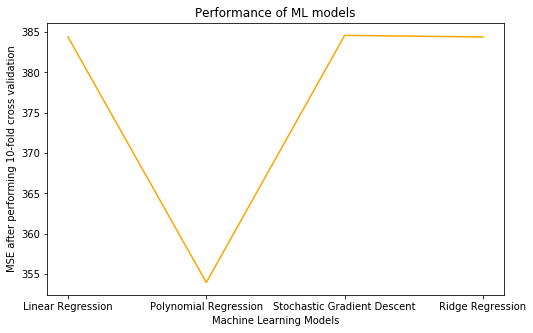

In [73]:
#select the model with the lowest error as your "production" model
#Line plot
model=['Linear Regression','Polynomial Regression','Stochastic Gradient Descent','Ridge Regression']
mse_values = [384.40,353.97,384.56,384.40]
fig = plt.figure(figsize(18,5))
fig.add_subplot(1,2,1)
plt.plot(model,mse_values, color='orange')
plt.xlabel('Machine Learning Models')
plt.ylabel('MSE after performing 10-fold cross validation')
plt.title('Performance of ML models')
plt.show()

*****************************************************************************
From above we can observe that Polynomial Regression performs better among all the models. Hence, the best model for this case study is Polynomial Regression.
***************************************************************************

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [84]:
#df_train_data_final.head(10)

In [50]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

#Loading the predictors/features in x_train and target = 'salary' in y_tgt
x_train=pd.DataFrame(scaled_df,columns = scaled_df.columns) 
y_tgt = pd.DataFrame(y,columns=['salary'])

print(x_train.head(10))
print(x_train.shape)
print(type(x_train))

print(y_tgt.head(10))
print(y_tgt.shape)
print(type(y_tgt))

   yearsExperience  milesFromMetropolis  CEO  CFO  CTO  JANITOR  JUNIOR  \
0         0.416667             0.838384  0.0  1.0  0.0      0.0     0.0   
1         0.125000             0.737374  1.0  0.0  0.0      0.0     0.0   
2         0.416667             0.383838  0.0  0.0  0.0      0.0     0.0   
3         0.333333             0.171717  0.0  0.0  0.0      0.0     0.0   
4         0.333333             0.161616  0.0  0.0  0.0      0.0     0.0   
5         0.083333             0.313131  0.0  0.0  0.0      0.0     0.0   
6         0.958333             0.242424  0.0  1.0  0.0      0.0     0.0   
7         0.375000             0.707071  0.0  0.0  0.0      0.0     1.0   
8         0.041667             0.545455  0.0  0.0  0.0      1.0     0.0   
9         0.708333             0.686869  0.0  0.0  0.0      0.0     0.0   

   MANAGER  SENIOR  BIOLOGY   ...     BACHELORS  DOCTORAL  HIGH_SCHOOL  \
0      0.0     0.0      0.0   ...           0.0       0.0          0.0   
1      0.0     0.0      0.

In [51]:
#Train the model using the best model - Polynomial Regression
poly_pipeline = PolynomialFeatures(degree=2)
poly_pipeline=PolynomialFeatures(interaction_only=True)
x_poly_train = poly_pipeline.fit_transform(x_train)
x_poly_train

array([[1.        , 0.41666667, 0.83838384, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.125     , 0.73737374, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.41666667, 0.38383838, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.66666667, 0.81818182, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.25      , 0.05050505, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.83333333, 0.11111111, ..., 0.        , 0.        ,
        0.        ]])

In [52]:
#build the model
model = LinearRegression()
model = model.fit(x_poly_train,y_tgt)
y_true = model.predict(x_poly_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
y_true            # numpy.ndarray

array([[127.1282959 ],
       [116.48425293],
       [135.19128418],
       ...,
       [ 63.23425293],
       [135.37902832],
       [112.67907715]])

In [ ]:
#Save the model to disk
#Pickle API is used for serializing standard python objects
#import pickle
#filename = 'Trained_SalaryData_Polynomial_Regression.sav'
#pickle.dump(model,open(filename,'wb'))

In [78]:
#joblib API is used for efficiently serializing Python objects with NumPy arrays
from sklearn.externals import joblib
filename = 'Trained_SalaryData_Polynomial_Regression.pk1'
joblib.dump(model, filename)

['Trained_SalaryData_Polynomial_Regression.pk1']

In [79]:
test_features_df.head(10)


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


In [64]:
#Preparing the test data for predictions - Feature Engineering and Data Transformation


#Perform OneHotEncoding on categorical data in test dataset
df_test_jobType = oneHotEncoding('jobType', test_features_df)
df_test_degree = oneHotEncoding('degree', test_features_df)
df_test_major = oneHotEncoding('major', test_features_df)
df_test_industry = oneHotEncoding('industry', test_features_df)
#df_test_industry.head()

In [67]:
#Concatenate all the one hot encoded dataframes into single dataframe including numerical variables for modelling
test_data_1hot = pd.DataFrame()
category_df_rmv = test_features_df.drop(columns = ['jobType','degree','major','industry','jobId','companyId'])
test_data_1hot = pd.concat([category_df_rmv[['yearsExperience','milesFromMetropolis']], \
                            df_test_jobType, df_test_degree, df_test_major, df_test_industry],axis = 1)
test_data_1hot.head()

,yearsExperience,milesFromMetropolis,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR,BACHELORS,...,ENGINEERING,LITERATURE,MATH,NONE,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE
0,22,73,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,20,47,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,17,9,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,14,96,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,10,44,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [69]:
# create a final copy of dataframe 
test_data_final = test_data_1hot.copy()
test_data_final.head()

,yearsExperience,milesFromMetropolis,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR,BACHELORS,...,ENGINEERING,LITERATURE,MATH,NONE,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE
0,22,73,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,20,47,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,17,9,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,14,96,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,10,44,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [70]:
#Perform Normalization on test data

#Get Column names first
col_names = test_data_final.columns
print(col_names)

# Create a scaler object 
# scaler = preprocessing.MinMaxScaler()

#Fit training data on to scaler object
test_scaled_df = scaler.fit_transform(test_data_final)
test_scaled_df = pd.DataFrame(test_scaled_df,columns=col_names)
test_scaled_df.head(10)

Index(['yearsExperience', 'milesFromMetropolis', 'CEO', 'CFO', 'CTO',
       'JANITOR', 'JUNIOR', 'MANAGER', 'SENIOR', 'BACHELORS', 'DOCTORAL',
       'HIGH_SCHOOL', 'MASTERS', 'BIOLOGY', 'BUSINESS', 'CHEMISTRY', 'COMPSCI',
       'ENGINEERING', 'LITERATURE', 'MATH', 'NONE', 'AUTO', 'EDUCATION',
       'FINANCE', 'HEALTH', 'OIL', 'SERVICE'],
      dtype='object')


,yearsExperience,milesFromMetropolis,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR,BACHELORS,...,ENGINEERING,LITERATURE,MATH,NONE,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE
0,0.916667,0.737374,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.833333,0.474747,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.708333,0.090909,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.583333,0.969697,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.416667,0.444444,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.250000,0.232323,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.250000,0.323232,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.375000,0.737374,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.250000,0.787879,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.958333,0.979798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [80]:
#Load the trained model

loaded_model = joblib.load(filename)
print("Model is loaded")
#result = loaded_model.score(X_test, Y_test)
loaded_model

Model is loaded


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [93]:
#Predict using loaded model
x_poly_test = poly_pipeline.fit_transform(test_scaled_df)

In [92]:
y_pred_test = loaded_model.predict(x_poly_test)

In [87]:
# Storing the predictions in data frame
final_model = pd.DataFrame(y_pred_test,columns=['salary'])
final_model.head()
final_model['salary']=final_model['salary'].astype('int64')

In [91]:
test_final_data = pd.concat([test_features_df,final_model],axis=1)
test_final_data.head(2)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73,140
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47,114


In [89]:
y_tgt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999995 entries, 0 to 999994
Data columns (total 1 columns):
salary    999995 non-null int64
dtypes: int64(1)
memory usage: 7.6 MB


### ---- 12 Deploy solution ----

In [96]:
# Save to csv file
filename='Test_Poly_Data.csv'
test_final_data.to_csv(filename,index=False)

In [95]:
test_final_data.describe(include=[np.number])

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1.000000e+06
mean,12.002104,49.526414,4.200255e+11
std,7.213179,28.889713,3.332916e+13
min,0.000000,0.000000,-1.146046e+14
25%,6.000000,25.000000,9.300000e+01
50%,12.000000,50.000000,1.350000e+02
75%,18.000000,75.000000,3.263535e+12
max,24.000000,99.000000,7.791402e+13


********************************************************
Last step is to Measure the efficacy, since we don't have the outcomes for the test data we shall skip this step.
***********************************************************